# YBI Foundation Capstone Project 

**Music Positiveness Prediction**

# Understanding About Dataset

**Context**

A dataset of 2017 songs with attributes from Spotify's API. I used this dataset to predict valence(Positiveness) of a music.

**Content**

Each row represents a song.

There are 16 columns. 13 of which are song attributes, one column for song name, one for artist, and a column called "target" which is the label for the song.

Here are the 13 track attributes: acousticness, danceability, durationms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, timesignature, valence.

Information on what those traits mean can be found here: https://developer.spotify.com/web-api/get-audio-features/


Here, I'll predict the valence of the music using **Ensemble Bagging Technique**. 

# Importing Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns

# Importing CSV File

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/nabinoy/Music-Positiveness-Prediction/main/data.csv')

# Fetching First and Last five rows of the dataset

In [ ]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
df.tail()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.333,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.131,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.107,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.133,150.011,4.0,0.623,0,First Contact,Twin Moons
2016,2016,0.00281,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.141,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers


# Getting Information About the Dataset 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


# Getting the column names of the dataset

In [ ]:
df.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

# Data Visualization

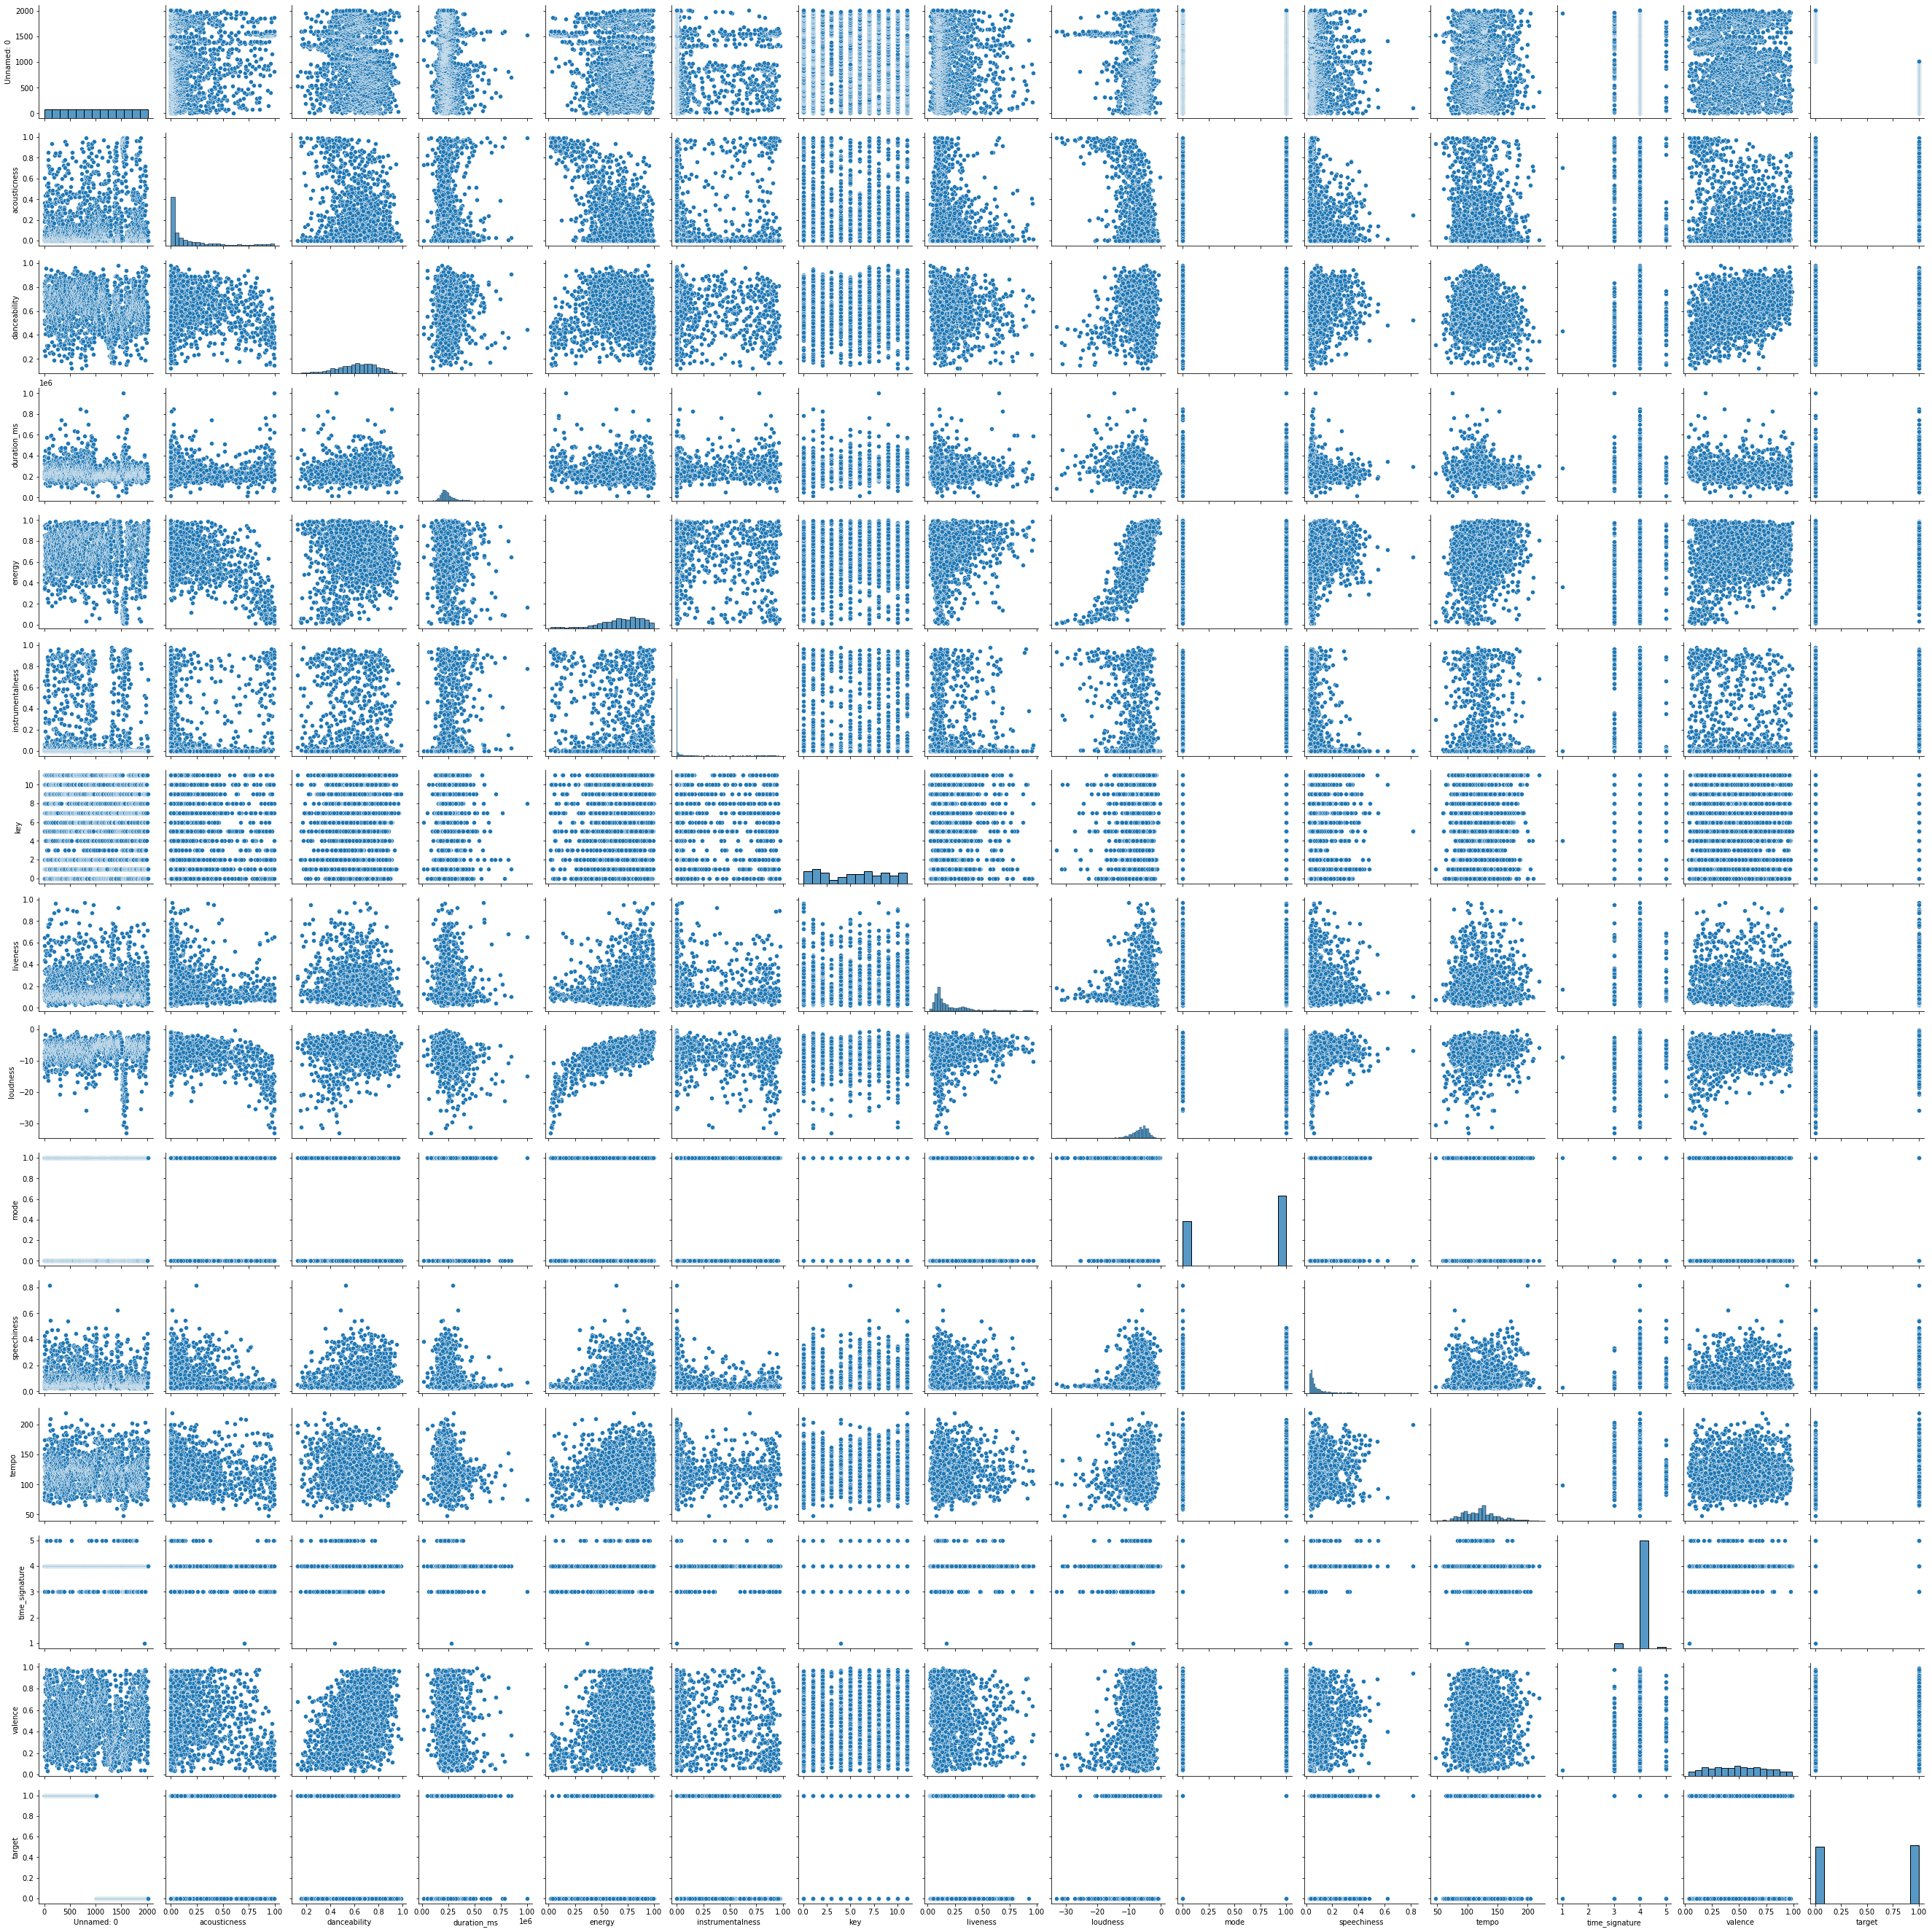

In [ ]:
sns.pairplot(df)

# Describing X(independent variable) and y(dependent variable)

In [ ]:
X = df[['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness',  'liveness', 'loudness',
       'speechiness', 'tempo', 'time_signature','target']]
       #'key','mode','song_title', 'artist' are not considered because they are not responsible attributes for the valence prediction.

In [ ]:
y = df['valence']

# Getting the description of the dataset

In [ ]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# Standardizing the data

In [ ]:
sc = StandardScaler()

In [ ]:
X = sc.fit_transform(X)

# Spliting of the data for training and testing 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, random_state = 1000) #70% of the data are used for training

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1411, 12), (606, 12), (1411,), (606,))

# Invoking the RandomForestRegressor Function

In [ ]:
rfr = RandomForestRegressor()

# Fitting and Prediction of the model

In [ ]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
y_pred

array([0.397345, 0.49491 , 0.605351, 0.125061, 0.63667 , 0.170448,
       0.7015  , 0.78554 , 0.36867 , 0.56098 , 0.58997 , 0.61876 ,
       0.645113, 0.56353 , 0.294437, 0.61885 , 0.57679 , 0.445556,
       0.59195 , 0.55188 , 0.67067 , 0.70892 , 0.37163 , 0.43954 ,
       0.436075, 0.52393 , 0.661277, 0.330385, 0.576   , 0.644813,
       0.54289 , 0.77763 , 0.495635, 0.58046 , 0.554008, 0.402476,
       0.445964, 0.510749, 0.340681, 0.44012 , 0.222281, 0.119159,
       0.274067, 0.27108 , 0.65889 , 0.639064, 0.69819 , 0.277073,
       0.294415, 0.423754, 0.536483, 0.68796 , 0.422634, 0.58494 ,
       0.440013, 0.4947  , 0.618677, 0.524776, 0.453471, 0.655604,
       0.716661, 0.56491 , 0.53498 , 0.54126 , 0.483217, 0.51629 ,
       0.119289, 0.426802, 0.516758, 0.74589 , 0.426358, 0.55289 ,
       0.7489  , 0.321192, 0.319353, 0.58845 , 0.48786 , 0.183783,
       0.341259, 0.474729, 0.37798 , 0.49604 , 0.6177  , 0.439955,
       0.65972 , 0.369121, 0.437384, 0.479393, 0.586538, 0.637

# Checking the accuracy of the model

In [ ]:
mean_absolute_error(y_test, y_pred)

0.15755814356435643

In [ ]:
mean_squared_error(y_test, y_pred)

0.037621233951265674

# Future Predictions

In [ ]:
X1=[[ 0.68182871,  2.45998058, -0.58651142, -0.64542748, -1.37748994,
       -0.48805652,  1.10772056, -0.49255467, -0.69141173,  0.90995687,
        0.12404825, -1.01146884]]
pred1 =  rfr.predict(X1)

In [ ]:
pred1

array([0.397345])

In [ ]:
X2=[[ -0.09617735,  2.19451919,  0.78004119, -0.93913859, -0.602115  ,
       -0.48805652, -0.53305167,  0.09083934, -0.67361599, -0.01357891,
        0.12404825,  0.98866121]]
pred2 =  rfr.predict(X2)

In [ ]:
pred2

array([0.63667])